<h1 style="font-size:50px; text-align: center; margin-bottom: 10px">Galaxy Simulation Demo</h1>
This notebook contains a demo of how to use the functions from galaxy_simulation.py. This includes calculating inspiral times for circular and eccentric binaries, randomly allocating positions and birth times to a sample of binaries and evolving binaries from DCO formation to merger.

These functions are useful in generating a mock Milky Way galaxy filled with binaries in order to assess the detectability of DCOs in LISA or other gravitational wave detectors.

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

from importlib import reload

# import sensitivity curves code from '/code' folder
import sys
sys.path.append("../LISA_detections")
import galaxy_simulation as gal
reload(gal)

%config InlineBackend.figure_format = 'retina'
plt.rc("font", family="serif")
fs = 20

In [138]:
def pretty_plot(figsize, xlabel, ylabel, fs=20):
    fig, ax = plt.subplots(1, figsize=figsize)
    ax.set_xlabel(xlabel, fontsize=fs)
    ax.set_ylabel(ylabel, fontsize=fs)
    ax.tick_params(axis="both", which="major", labelsize=0.7 * fs)
    
    return fig, ax

# Inspiral Time Calculation
We can, given a starting separation and eccentricity and masses, calculate the amount of time it takes a binary to merge from this point, also known as the inspiral time of a binary. In Peters (1964), equation 5.14 give a general solution for eccentric binaries. You can use `inspiral_time(a0, e0, m1, m2)` to calculate this equation.

In [15]:
m1 = 10 * u.Msun
m2 = 1.4 * u.Msun

a0 = 10 * u.Rsun
e0 = 0.5

print(gal.inspiral_time(a0, e0, m1, m2))

3.3673482189506028 Gyr


We can use this equation to see how the inspiral time varies with each parameter. For example, let's see how eccentricity affects the inspiral time.

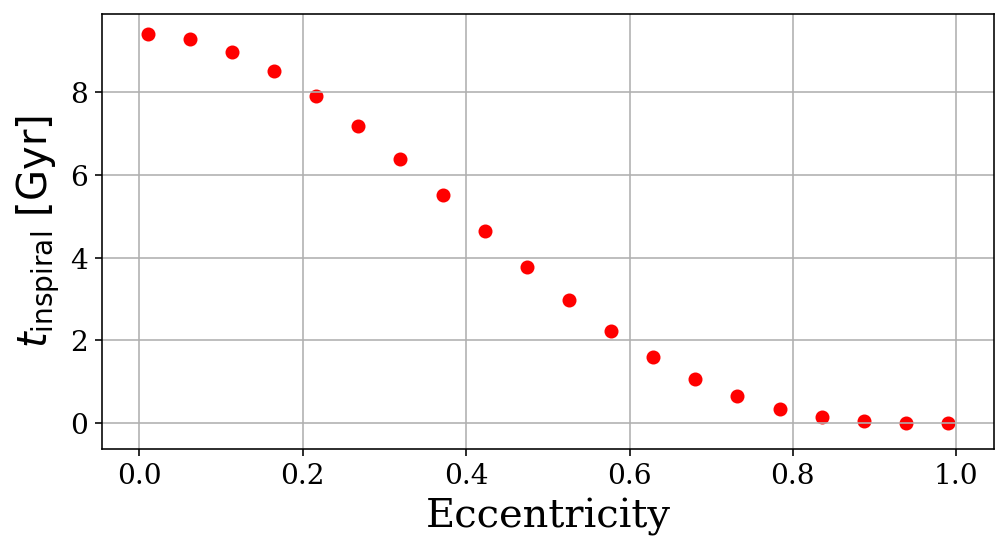

In [142]:
fig, ax = pretty_plot((8, 4), "Eccentricity", r"$t_{\rm inspiral}\  [\rm Gyr]$")

for e0 in np.linspace(0.01, 0.99, 20):
    ax.scatter(e0, gal.inspiral_time(a0, e0, m1, m2), color='r')

ax.grid(True)

plt.show()

# Generate random inspiral times
When simulating binaries with a population synthesis code, it is useful to assign each binary a birth time. Our function assuming continuous star formation (alternatives may be added later). The function also assuming that each binary already has an assigned $t_{\rm evolve}$, the time from birth to DCO formation. We can then generate the amount of time between its DCO formation and today, where this time may be *greater* than its time to merger.

Try changing the number of `SAMPLES` to see how the time range is filled in of larger sample sizes.

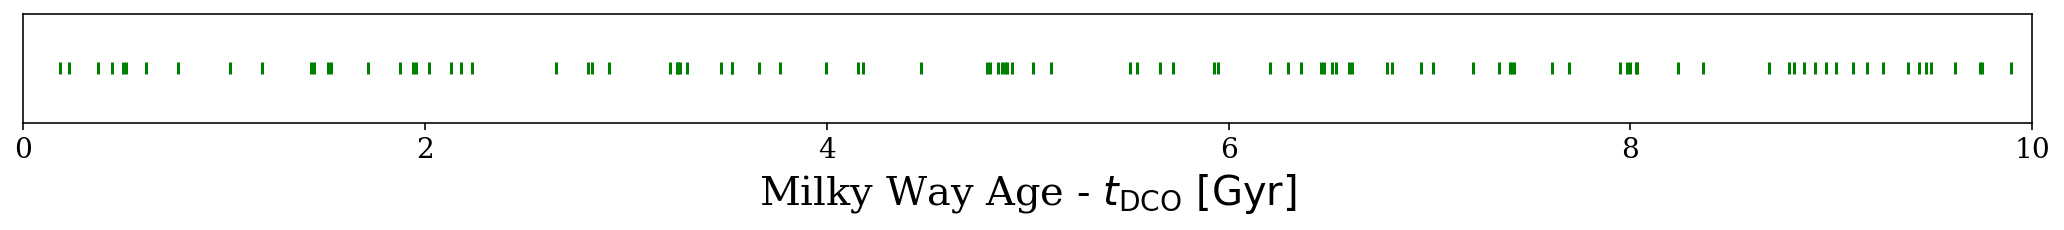

In [144]:
# create a random list of tevolve (usually already know)
SAMPLES = 100
evolution_times = np.random.rand(SAMPLES) * 30 * u.Myr

fig, ax = pretty_plot((18, 1), r"Milky Way Age - $t_{\rm DCO}\ [\rm Gyr]$", "N/A")

# plot the generated inspiral times
age = 10 * u.Gyr
ax.scatter(gal.generate_inspiral_times(SAMPLES, evolution_times, age=age), np.zeros(SAMPLES), marker='|', color="g")

ax.set_xlim(0, age.value)
ax.get_yaxis().set_visible(False)

plt.show()

# Generate random positions in the Milky Way
We use the McMillan (2011) paper to generate random positions for binaries in the Milky Way. We assign each a random radius, height and angle and then calculate the distance from Earth assuming that the distance to the centre of the Milky Way is 8.2 kpc.

First, let's simulate some binaries that we want to place in the Milky Way.

In [151]:
BINARIES = 1000
Mc = np.random.uniform(2, 8, BINARIES) * u.Msun
f  = np.random.uniform(1e-5, 1e-3, BINARIES) * u.Hz

Now we can generate an array of random distances and also return the associated positions. From these we can plot the distributions in the galaxy from the side and from above.

In [183]:
distances, positions = gal.simulate_mw_distances(BINARIES, return_pos=True)
r, z, theta = positions

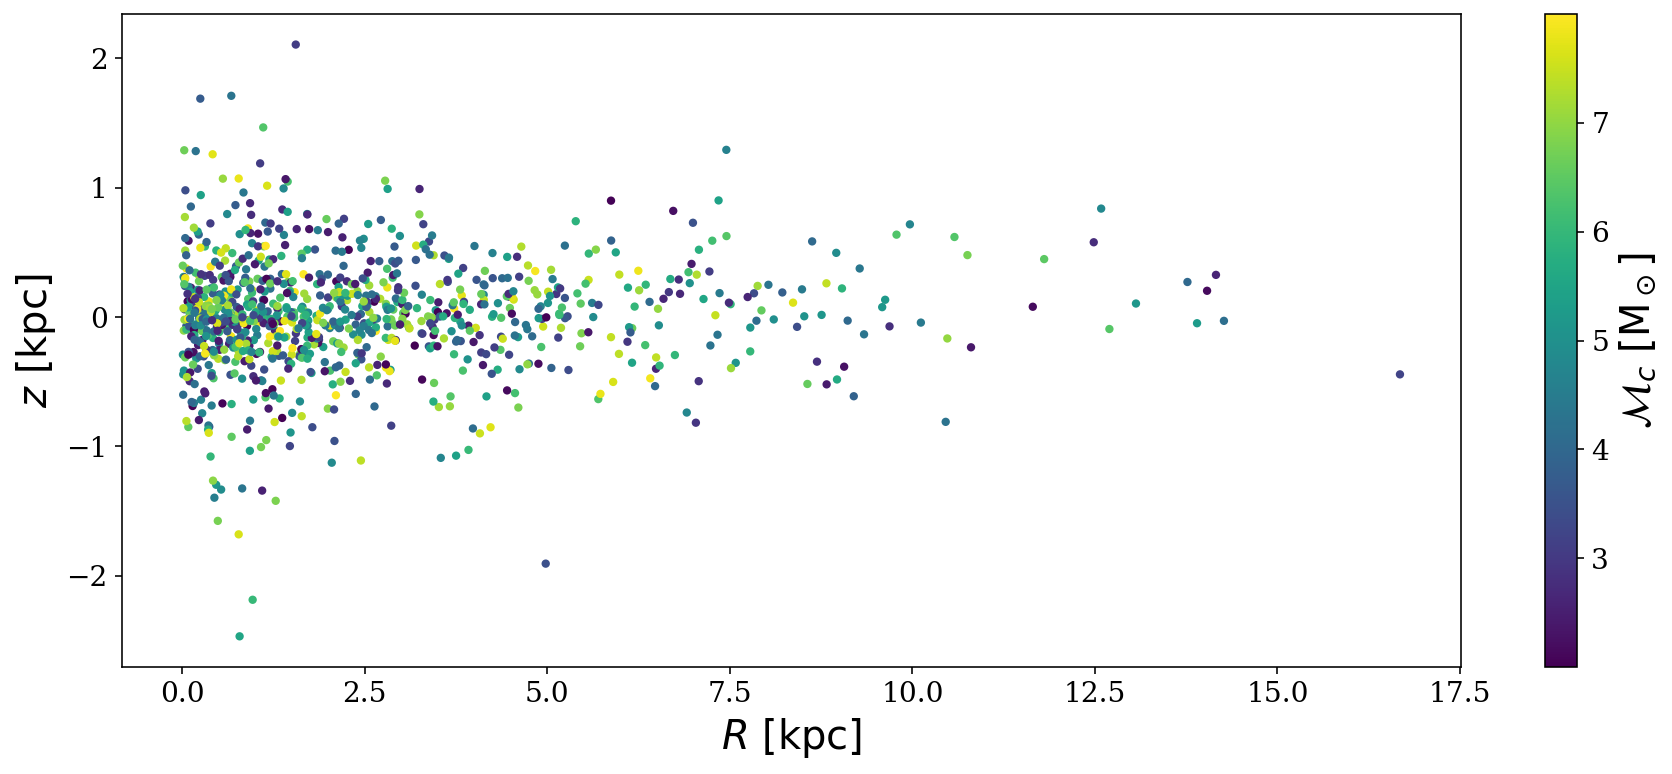

In [184]:
fig, ax = pretty_plot((15, 6), r"$R \ [\rm kpc]$", r"$z \ [\rm kpc]$")

scatter = ax.scatter(r, z, c=Mc, s=10)
cbar = plt.colorbar(scatter)
cbar.set_label(r"$\mathcal{M}_c\ [\rm M_\odot]$", fontsize=fs)
cbar.ax.tick_params(axis="both", which="major", labelsize=0.7*fs)

plt.show()

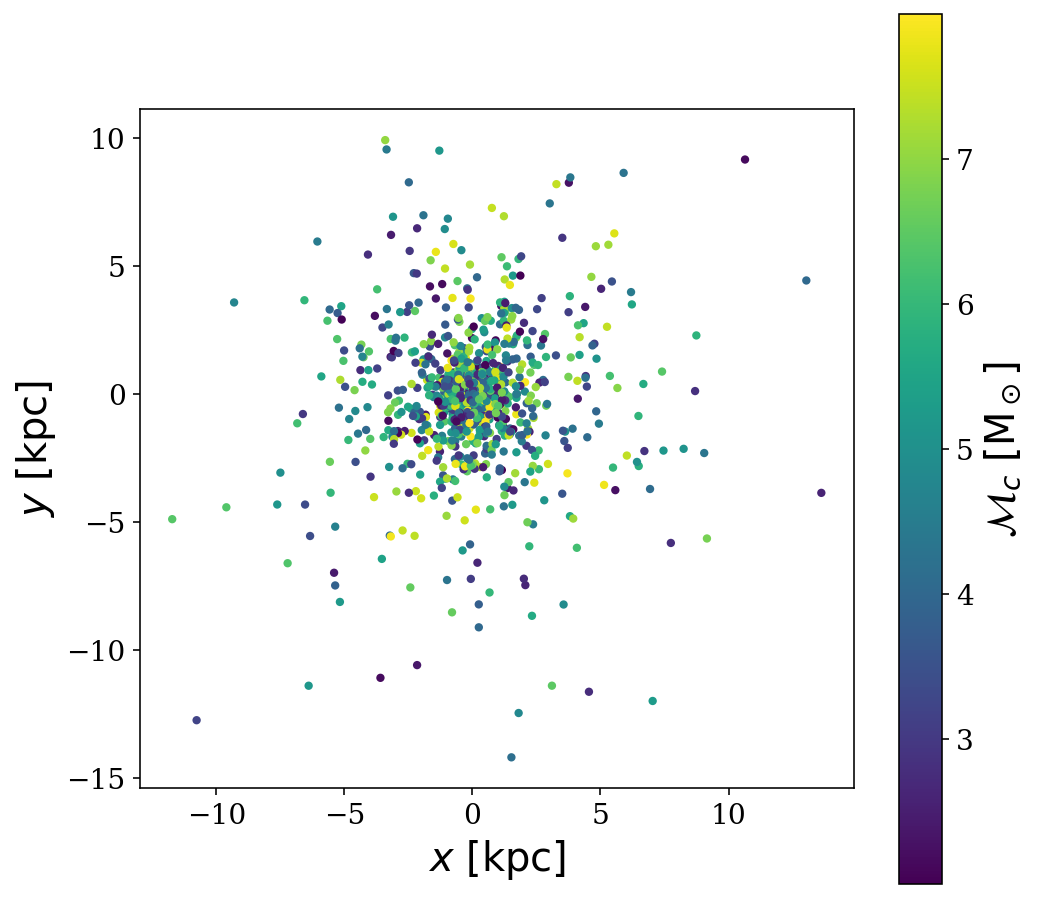

In [185]:
fig, ax = pretty_plot((8, 8), r"$x \ [\rm kpc]$", r"$y \ [\rm kpc]$")

scatter = ax.scatter(r * np.cos(theta), r * np.sin(theta), c=Mc, s=10)
cbar = plt.colorbar(scatter)
cbar.set_label(r"$\mathcal{M}_c\ [\rm M_\odot]$", fontsize=fs)
cbar.ax.tick_params(axis="both", which="major", labelsize=0.7*fs)
ax.set_aspect("equal")

plt.show()

It is also interesting to look at the distribution of distances, which is peaked around the distance from the Earth to the centre of the Milky Way. This makes sense as the density distribution of the Milky Way is highest at the centre of the galaxy so most binaries should be placed there.

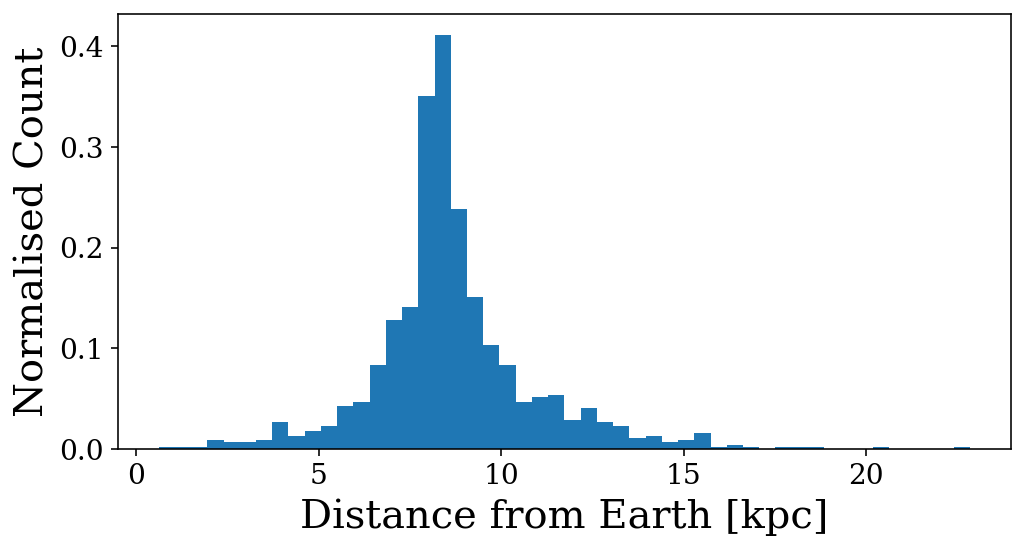

In [191]:
fig, ax = pretty_plot((8, 4), "Distance from Earth [kpc]", "Normalised Count")

ax.hist(distances.value, bins=50, density=True)

plt.show()

# TODO: Add binary evolution demo